<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW1.2_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.2 Linear Algebra**

---



### **Key Concepts:**


*   1.2.1. Linear spaces
*   1.2.2. Orthogonality
*   1.2.3. Gram–Schmidt process
*   1.2.4. Eigenvalues and eigenvectors

In [3]:
### important imports to run code ###

import numpy as np
import sympy

## **1.2.1 Linear Spaces**


**Linear Combinations:** An expression constructed from a subset by multiplying each term by a constant and adding the results.

In [ ]:
### Linear Combinations Examples ###

# Define two vectors in R^2
v1 = np.array([1, 5])
v2 = np.array([2, 8])

# Define two scalars
a1 = 4
a2 = 7

# Calculate the linear combination
# Any mix of these vectors and scalars using multiplication and addition would result in a linear combination
combination1 = a1 * v1 + v2 * a2
combination2 = v1 * a2 + a1 * v2

print("The linear combination of a1*v1 + v2*a2: ", combination1)
print("The linear combination of v1*a2 + a1*v2: ", combination2)
# There are many more combinations you can create with these vectors and scalars, but these are two examples
# This is showing that you can use multiplication and addition on any mix of vectors and scalars

The linear combination of a1*v1 + v2*a2:  [18 76]
The linear combination of v1*a2 + a1*v2:  [15 67]


**Linear Subspace:** A linear subspace of V is a subset U⊆V that is closed under vector addition and scalar multiplication. That is for all $u_1,u_2$∈U and a∈ℝ, it holds that **$u_1$+$u_2$∈U** and **a$u_1$∈U**

In [ ]:
### Linear Subspace Examples ###

# Define two vectors in R^4
v1 = np.array([1, 3, 6, 9])
v2 = np.array([2, 4, 6, 8])

# Check that the vectors are closed under addition
add = v1 + v2

# Check that the vector is closed under scalar multiplication
a = 8
scal_mult = a * v1

print("v1 + v2 =", add)
print("8 * v1 =", scal_mult)

# Both results will be in the same dimension, therefore showing that they form subspaces

v1 + v2 = [ 3  7 12 17]
8 * v1 = [ 8 24 48 72]


**Span:** Let $w_1$, ..., $w_m$∈V. The span of {$w_1, ..., w_m$}, denoted span($w_1$, ..., $w_m$), is the set of all linear combinations of the $w_j$’s. That is,

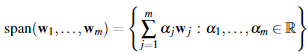

  Every Span is a Linear subspace!

In [ ]:
### Span Examples ###

# Define two vectors in R^2
v1 = np.array([3, 4])
v2 = np.array([8, 6])

# Define scalar values
s = np.linspace(-2, 3, 4)

# A set to store all possible linear combinations
# This is our span
span = set()

# Generate all combinations of v1 and v2 with the possible scalars
for a1 in s:
    for a2 in s:
        # Create a value lin_comb to hold the linear combination
        lin_comb = a1 * v1 + a2 * v2
        # Hold the combinations in the set
        span.add(tuple(lin_comb))

# Convert the set to an array to show below
span_array = np.array(list(span))

print("All unique points in the span of v1 and v2:\n", span_array)

All unique points in the span of v1 and v2:
 [[ 23.          16.66666667]
 [-17.         -13.33333333]
 [  9.66666667   6.66666667]
 [ 18.          10.        ]
 [ -8.66666667 -10.        ]
 [ -3.66666667  -3.33333333]
 [  6.33333333  10.        ]
 [ 33.          30.        ]
 [-22.         -20.        ]
 [ -7.           0.        ]
 [ 14.66666667  13.33333333]
 [ 19.66666667  20.        ]
 [ 28.          23.33333333]
 [-12.          -6.66666667]
 [  1.33333333   3.33333333]
 [  4.66666667   0.        ]]


**Column Space:** The column space of A (A∈$ℝ^{nxm}$, an nxm matrix with columns $au_1, ..., a_m$∈$ℝ^n$), denoted col(A), is the span of the columns of A, that is col(A)=span($a_1, ..., a_m$)

In [ ]:
### Column Space Examples ###


# Define a matrix A
A = sympy.Matrix([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3)

# Define a matrix B
B = sympy.Matrix([2, 4, 6, 8, 3, 6, 9, 12]).reshape(2, 4)

# Original A matrix
print("Matrix A:")
sympy.pprint(A)

# Use sympy.columnspace()
col_space_A = A.columnspace()

# Show the columns of matrix A's column space
print("\nColumnspace of matrix A:")
for col in col_space_A:
    sympy.pprint(col)

# Original B matrix
print("\nMatrix B:")
sympy.pprint(B)

# Use sympy.columnspace()
col_space_B = B.columnspace()

# Show the columns of matrix B's column space
print("\nColumnspace of matrix B:")
for col in col_space_B:
    sympy.pprint(col)

Matrix A:
⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

Columnspace of matrix A:
⎡1⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣7⎦
⎡2⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣8⎦

Matrix B:
⎡2  4  6  8 ⎤
⎢           ⎥
⎣3  6  9  12⎦

Columnspace of matrix B:
⎡2⎤
⎢ ⎥
⎣3⎦


**Linear Independence:** a list of vectors $u_1, ..., u_m$ is linearly independent if none of them can be written as a linear combination of the others, that is

image.png

In [ ]:
### Linear Independence Examples ###

# Linearly Dependent Matrix M1
M1 = sympy.Matrix([[4, 5, 6],
                  [8, 10, 12],
                  [12, 15, 18]])

# Linearly Independent Matrix M2
M2 = sympy.Matrix([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

# Function to check linear independence using the matrix m and the name
def check_linear_independence(m, name):
    print(f"Matrix {name}:")
    sympy.pprint(m)
    # using rank to show its dependence/independence
    rank = m.rank()
    print(f"\nRank of Matrix {name}: {rank}")
    if rank == m.shape[1]:
        print(f"The columns of Matrix {name} are linearly independent.\n")
    else:
        print(f"The columns of Matrix {name} are linearly dependent.\n")

# Check linear independence for both matrices
check_linear_independence(M1, 'M1')
check_linear_independence(M2, 'M2')

Matrix M1:
⎡4   5   6 ⎤
⎢          ⎥
⎢8   10  12⎥
⎢          ⎥
⎣12  15  18⎦

Rank of Matrix M1: 1
The columns of Matrix M1 are linearly dependent.

Matrix M2:
⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Rank of Matrix M2: 3
The columns of Matrix M2 are linearly independent.



## **1.2.2. Orthogonality**

**Orthonormal Bases:** A list of vectors {$u_1,... , u_m$} is orthonormal if the $U_i's$ are pairwise orthogonal and each has a norm 1, that is for all i and all j≠i, <$u_i,u_j$>=0 and ||$u_i$||=1.



In [ ]:
### Orthonormal Bases Examples ###

# Orthogonal vectors
V1 = np.array([1, 0, 0])
V2 = np.array([0, 1, 0])
V3 = np.array([0, 0, 1])

# Print original vectors
print("Original Vectors:")
print("V1: ", V1)
print("V2: ", V2)
print("V3: ", V3)

# Check orthogonality
print("Dot products (should be zero for orthogonal vectors):")
print("V1*V2: ", np.dot(V1, V2))
print("V1*V3: ", np.dot(V1, V3))
print("V2*V3: ", np.dot(V2, V3))

# To get the orthonormal basis, normalize the vectors
normV1 = V1 / np.linalg.norm(V1)
normV2 = V2 / np.linalg.norm(V2)
normV3 = V3 / np.linalg.norm(V3)

# Showing orthonormality, dot products are 1 for same vector
print("\nThe normalized vectors:")
print("V1: ", np.linalg.norm(normV1))
print("V2: ", np.linalg.norm(normV2))
print("V3: ", np.linalg.norm(normV3))

# Showing orthogonality, dot products should be 0
print("\nDot products of normalized vectors:")
print("V1*V2: ", np.dot(normV1, normV2))
print("V1*V3: ", np.dot(normV1, normV3))
print("V2*V3: ", np.dot(normV2, normV3))

Original Vectors:
V1:  [1 0 0]
V2:  [0 1 0]
V3:  [0 0 1]
Dot products (should be zero for orthogonal vectors):
V1*V2:  0
V1*V3:  0
V2*V3:  0

The normalized vectors:
V1:  1.0
V2:  1.0
V3:  1.0

Dot products of normalized vectors:
V1*V2:  0.0
V1*V3:  0.0
V2*V3:  0.0


**Best Approximation Theorem:** We have a linear subspace U⊆V and a vector v∉U. We want to find the vector v$^*$ in U that is closest to v in the norm,
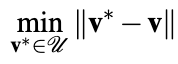

In [ ]:
### Best Approximation Theorem Examples ###

# Orthonormal supspace S
V1 = np.array([0, 0, 1])
V2 = np.array([0, 1, 0])

# Print original subspace
print("Supspace S:")
print(V1)
print(V2)

# Vector in R^3 for projection
vec = np.array([3, 6, 9])
print("Vector:\n", vec)

# Projection of v onto S
proj = np.dot(vec, V1) * V1 + np.dot(vec, V2) * V2
print("Project of vector vec onto Subspace S using best approximation:\n", proj)

# Error, distance between v and the projection onto S
err = np.linalg.norm(vec - proj)
print("Distance between Vector vec and the projection onto Subspace S:\n", err)



Supspace S:
[0 0 1]
[0 1 0]
Vector:
 [3 6 9]
Project of vector vec onto Subspace S using best approximation:
 [0 6 9]
Distance between Vector vec and the projection onto Subspace S:
 3.0


## **1.2.3. Gram–Schmidt Process**

**Gram-Schmidt Process:** Used to obtain an orthonormal basis. Takes advantage of the properties of the orthogonal projection derived. In essence we add the vectors a$_i$ one by one, but only after taking out their orthogonal projection on the previously included vectors. The outcome spans the same subspace and orthogonal decomposition esures orthogonality.

In [9]:
### Gram-Schmidt Process Examples ###

# Function to complete the Gram-Schmidt Process
def Gram_Schmidt_Process(vecs):

  # Initializing an empty list to store the orthogonal basis later
  orthogonal_basis = []

  # Begin the Gram-Schmidt Process
  for v in vecs:
    # Copy the current vector into current_v
    current_v = np.copy(v) + 0.0

    # Subtract the projection onto the previous orthogonal vectors
    for b in orthogonal_basis:

      # Compute the projection
      proj = np.dot(current_v, b) * b
      # Subtract the projection from the current vector
      current_v -= proj

    # Compute the normalization on the orthogonal vector
    normalized_v = current_v / np.linalg.norm(current_v)
    # Add that normalized vector to the list of orthogonal basis
    orthogonal_basis.append(normalized_v)

  return np.array(orthogonal_basis)

In [22]:
# Using the Gram-Schmidt Process function

vecs = np.array([[2, 0, 0], [1, 2, 2], [1, 1, 2]])
print("Vectors:\n", vecs)
# Calling the Gram-Schmidt Process function
orthonormal_basis = Gram_Schmidt_Process(vecs)
print("Orthonormal Basis using the Gram-Schmidt Process:\n", orthonormal_basis)

Vectors:
 [[2 0 0]
 [1 2 2]
 [1 1 2]]
Orthonormal Basis using the Gram-Schmidt Process:
 [[ 1.          0.          0.        ]
 [ 0.          0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678]]


## **1.2.4. Eigenvalues and Eigenvectors**

**Eigenvalues and Eigenvectors:** Let A∈ℝ$^{dxd}$ ve a square matrix. Then λ∈ℝ is an eigenvalue of A if there exists a nonzero vector **x≠0** such that

**Ax = λx**

The vector x is referred to as an eigenvector.

In [23]:
### Eigenvalues and Eigenvectors Examples ###

M = np.array([[-3, 6],
              [2, 8]])
print("Matrix:\n", M)

# Find the Eigenvalues and Eigenvectors using numpy
eigenvals, eigenvecs = np.linalg.eig(M)

print("Eigenvalues\n", eigenvals)
print("Eigenvectors\n", eigenvecs)

Matrix:
 [[-3  6]
 [ 2  8]]
Eigenvalues
 [-4.  9.]
Eigenvectors
 [[-0.98639392 -0.4472136 ]
 [ 0.16439899 -0.89442719]]


**Diagonalization of Symmetric Matrices:** Let A be similar to a matrix D = diag($λ_1,...,λ_d$) with distinct diagonal entries, that is, there exists a nonsingular matirx P such that

A = $PDP^{-1}$.

Let $p_1,...,p_d$ be the columns of P. Then

$AP = PD$

which implies that

$Ap_i=λ_ip_i$.

If A is symmetric, then any two eigenvectors from different eigenspaces are orthogonal.

In [24]:
### Diagonalization of Symmetric Matrices Examples ###

# Using the matrix from above ^ M
print("Original Matrix:\n", M)

# Find the Eigenvalues and Eigenvectors using numpy
eigenvals, eigenvecs = np.linalg.eig(M)
print("Eigenvalues:\n", eigenvals)
print("Eigenvectors (P):\n", eigenvecs)

# Diagonal matrix D
D = np.diag(eigenvals)
print("Diagonal Matrix (D):\n", D)

# Solve for A = PDP^-1

# P
P = eigenvecs
# P^-1
inv_P = np.linalg.inv(P)
# A = P*D*P^-1 using matirx multiplication
A = P @ D @ inv_P
print("Diagonalization (PDP^-1):\n", A)


Original Matrix:
 [[-3  6]
 [ 2  8]]
Eigenvalues:
 [-4.  9.]
Eigenvectors (P):
 [[-0.98639392 -0.4472136 ]
 [ 0.16439899 -0.89442719]]
Diagonal Matrix (D):
 [[-4.  0.]
 [ 0.  9.]]
Diagonalization (PDP^-1):
 [[-3.  6.]
 [ 2.  8.]]


**Constrained Optimization:** Let A be n x n symmetric matrix A with an orthogonal diagonalization A = $PDP^{-1}$. The columns of P are orthonormal eigenvectors $v_1,...,v_n$ of A. Assume that the diagonal of D are arranged so that $λ_1≤λ_2,...,≤λ_n$. Then

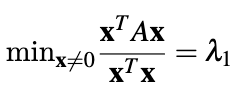

is achieved when x=v$_1$ and

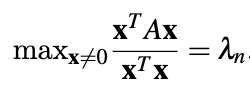

...

Rearranging the terms gives

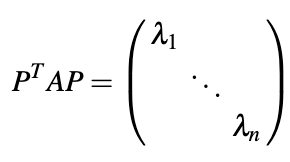

In [33]:
### Constrained Optimization Examples ###

# Using the matrix from above ^ M
print("Matrix:\n", M)

# Find the Eigenvalues and Eigenvectors using numpy
eigenvals, eigenvecs = np.linalg.eig(M)
print("Eigenvalues:\n", eigenvals)
print("Eigenvectors:\n", eigenvecs)

# Find the Min value with the eigenvector assoicated to the min eigenvalue
min = np.argmin(eigenvals)
min_eig_val = eigenvals[min]
min_eig_vec = eigenvecs[:,min]

print("Min Eigenvalue:\n", min_eig_val)
print("Min Eigenvector (associated with the Min Eigenvalue):\n", min_eig_vec)

Matrix:
 [[-3  6]
 [ 2  8]]
Eigenvalues:
 [-4.  9.]
Eigenvectors:
 [[-0.98639392 -0.4472136 ]
 [ 0.16439899 -0.89442719]]
Min Eigenvalue:
 -4.0
Min Eigenvector (associated with the Min Eigenvalue):
 [-0.98639392  0.16439899]


## **References:**
[Mathematical Methods in Data Science](https://shop.elsevier.com/books/mathematical-methods-in-data-science/ren/978-0-443-18679-0), Jingli Ren and Haiyan Wang, Elsevier, 2023

